# <font color=blue>Exploratory data analysis</font>
### <font color=red>Akhilesh Kumar</font>

## Data understanding

#### Read loan data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sns
from IPython.display import display, HTML
import warnings
warnings.filterwarnings('ignore')

loan_df = pd.read_csv("loan_data_set.csv",low_memory=False)
loan_df.head(5)

C:\Users\u61152\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,employee_id,emp_title,emp_length,employee_id.1,funded_amount,funded_amount_invest,loan_amount,term,interest_rate,installment,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1296599,NaN,10+ years,1296599,5000,4975.0,5000,36 months,10.65%,162.87,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1314167,Ryder,< 1 year,1314167,2500,2500.0,2500,60 months,15.27%,59.83,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1313524,NaN,10+ years,1313524,2400,2400.0,2400,36 months,15.96%,84.33,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1277178,AIR RESOURCES BOARD,10+ years,1277178,10000,10000.0,10000,36 months,13.49%,339.31,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1311748,University Medical Group,1 year,1311748,3000,3000.0,3000,60 months,12.69%,67.79,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


#### Total rows and columns

In [2]:
print(loan_df.shape)

(39717, 113)


## Data Cleaning

 #### Clean Rows and Columns
 There are total 39717 rows, and 111 columns lets check and remove invalid rows and columns which has less data.

In [3]:
#check for complete null rows in loan_df dataframe
loan_df.isnull().all(axis=1).sum()

0

#### Remove coulmns with all null

In [4]:
loan_df = loan_df.dropna(axis='columns', how='all')
print(loan_df.shape)

(39717, 58)


#### Calculate number of unquie, missing, missing %, type

In [5]:
unique_values = loan_df.nunique()
filtered_empty = loan_df.isnull().sum(axis=0)
mis_val_percent = loan_df.isna().mean().round(4) * 100
data_type = loan_df.dtypes
val_table = pd.concat([unique_values,filtered_empty, mis_val_percent, data_type], axis=1,sort =True)
val_table_columns = val_table.rename(columns = {0: 'Unique', 1 : 'Missing Values', 2 : 'missing %', 3: 'type'})
val_table_columns = val_table_columns.sort_values('missing %', ascending=False)
val_table_columns

,Unique,Missing Values,missing %,type
next_pymnt_d,2,38577,97.13,object
mths_since_last_record,111,36931,92.99,float64
mths_since_last_delinq,95,25682,64.66,float64
desc,26527,12940,32.58,object
emp_title.1,28820,2459,6.19,object
emp_title,28820,2459,6.19,object
emp_length,11,1075,2.71,object
pub_rec_bankruptcies,3,697,1.75,float64
last_pymnt_d,101,71,0.18,object
chargeoff_within_12_mths,1,56,0.14,float64


#### We should remove more than 90% missing values but looking into above data we can remove till 30% missing values

In [6]:
loan_df = loan_df.loc[:,loan_df.isna().mean().round(4) * 100 < 30.00]
loan_df.shape

(39717, 54)

#### Remove columnns with too many unique values

In [7]:
loan_df = loan_df.drop(['employee_id','total_pymnt','url', 'emp_title'], axis =1)
loan_df.shape

(39717, 50)

#### Remove coulmn with only one unique values

In [8]:
# Also we observed some columns have only one unique values such as "pymnt_plan" and "application_type" etc.,
# these columns also can be ommitted

columns_with_only_one_unique_value = unique_values.loc[unique_values == 1]
print("---------------------------------------------------")
print(" Count of Columns with only one unique value  :: "+str(len(columns_with_only_one_unique_value)))
print("---------------------------------------------------")
print(columns_with_only_one_unique_value)

---------------------------------------------------
 Count of Columns with only one unique value  :: 9
---------------------------------------------------
pymnt_plan                    1
initial_list_status           1
collections_12_mths_ex_med    1
policy_code                   1
application_type              1
acc_now_delinq                1
chargeoff_within_12_mths      1
delinq_amnt                   1
tax_liens                     1
dtype: int64


In [9]:
columns_with_only_one_unique_value_nm = np.array(columns_with_only_one_unique_value.index.values)
loan_df = loan_df.drop(columns_with_only_one_unique_value_nm , axis=1)
print(loan_df.shape)

(39717, 41)


#### Remove few columns on business justification

In [10]:
loan_final_df = loan_df.drop(['title','issue_d','total_rec_int', 'total_pymnt_inv','total_rec_prncp','total_rec_late_fee','out_prncp','out_prncp_inv' ], axis=1)

#### Standardise column's value:

Int_rate - strip % from values

emp_length - strip '>' , 'years', 'year', '+' from values

revol_util - strip % from values

In [11]:
loan_final_df['interest_rate'] = loan_final_df['interest_rate'].astype(str)
loan_final_df['interest_rate'] = loan_final_df['interest_rate'].apply(lambda x: x.strip('%'))
loan_final_df['interest_rate'] = loan_final_df['interest_rate'].astype(float)

In [12]:
loan_final_df['emp_length'] = loan_final_df.emp_length.map({'< 1 year': 0, '1 year': 1, '2 years': 2, '3 years' : 3,
                                             '4 years': 4, '5 years': 5, '6 years': 6, '7 years': 7,
                                             '8 years': 8, '9 years': 9, '10+ years': 10, np.nan : 'NAN'})

In [13]:
loan_final_df['revol_util'] = loan_final_df['revol_util'].astype(str)
loan_final_df['revol_util'] = loan_final_df['revol_util'].apply(lambda x: x.strip('%') )
loan_final_df['revol_util'] = loan_final_df['revol_util'].astype(float)

#### Check for outliers i.e. compare mean, median and percentile on few coulmns

In [14]:
#laon_amount
print('----laon_amount-------')
mean = loan_final_df.loan_amount.mean()
median = loan_final_df.loan_amount.median()
print(mean)
print(median)
print(loan_final_df.loan_amount.quantile(0.80))
print(loan_final_df.loan_amount.quantile(0.90))
print(loan_final_df.loan_amount.quantile(0.95))

#funded_amnt
print('-------funded_amnt-------')
mean = loan_final_df.funded_amount.mean()
median = loan_final_df.funded_amount.median()
print(mean)
print(median)
print(loan_final_df.funded_amount.quantile(0.80))
print(loan_final_df.funded_amount.quantile(0.90))
print(loan_final_df.funded_amount.quantile(0.95))

----laon_amount-------
11219.443814991062
10000.0
16750.0
22000.0
25000.0
-------funded_amnt-------
10947.713195860715
9600.0
16000.0
21000.0
25000.0


#### Final dataset for Analysis

In [15]:
print(loan_final_df.shape)
print(loan_final_df.info())

(39717, 33)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   emp_length               39717 non-null  object 
 1   employee_id.1            39717 non-null  int64  
 2   funded_amount            39717 non-null  int64  
 3   funded_amount_invest     39717 non-null  float64
 4   loan_amount              39717 non-null  int64  
 5   term                     39717 non-null  object 
 6   interest_rate            39717 non-null  float64
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_title.1              37258 non-null  object 
 11  home_ownership           39717 non-null  object 
 12  annual_inc               39717 non-null  float64
 13  verification_status      39717 non-null  object 
 14  loan_statu

## Data Analysis

#### Check for loan status

In [16]:
loan_df['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

#### Removing rows where loan_status is current as we are doing analysis for borrower probability for default or not which is binary in nature

In [17]:
loan_final_df = loan_final_df.loc[loan_final_df['loan_status'].isin(['Fully Paid','Charged Off'])]
loan_final_df['loan_status'].value_counts(normalize=False, dropna=False)
loan_final_df['loan_status'].value_counts(normalize=True, dropna=False)

Fully Paid     0.854136
Charged Off    0.145864
Name: loan_status, dtype: float64

 ##### Now after above clean up lets look at missing values which we can fill by business judgement

In [18]:
# emp_length column as some missing values lets look for ideal which we can use to fill those missing values
# Standardize emp_length column values as 0 to 10 as suggested in Data_Dictionary.xlsx
print(loan_final_df.groupby(['emp_length']).emp_length.count())
print("---------------------------------------------------")
excluded_rows_where_emp_length_missing = loan_final_df.loc[loan_final_df.emp_length != 'NAN']
print(excluded_rows_where_emp_length_missing.emp_length.describe())
print("---------------------------------------------------")
print("Median value of emp_length column :: ")
print(excluded_rows_where_emp_length_missing.emp_length.median())

emp_length
0      4508
1      3169
2      4291
3      4012
4      3342
5      3194
6      2168
7      1711
8      1435
9      1226
10     8488
NAN    1033
Name: emp_length, dtype: int64
---------------------------------------------------
count     37544
unique       11
top          10
freq       8488
Name: emp_length, dtype: int64
---------------------------------------------------
Median value of emp_length column :: 
4.0


In [19]:
# from above describe observation there are (38577 - 37544) = 1033 values missing for emp_length
# since it is non ordinial and categorical variable lets impute the missing values by median value 4
loan_final_df.emp_length = loan_final_df.emp_length.apply(lambda x: x if x != 'NAN' else 4)
loan_final_df['emp_length'] = loan_final_df['emp_length'].astype(int)
print("After imputing with meadian value 4 for missing values.")
print("--------------------------------------------------------")
print(loan_final_df.emp_length.describe())
print("--------------------------------------------------------")
print(loan_final_df.groupby(['emp_length']).emp_length.count())

After imputing with meadian value 4 for missing values.
--------------------------------------------------------
count    38577.000000
mean         4.915779
std          3.512419
min          0.000000
25%          2.000000
50%          4.000000
75%          9.000000
max         10.000000
Name: emp_length, dtype: float64
--------------------------------------------------------
emp_length
0     4508
1     3169
2     4291
3     4012
4     4375
5     3194
6     2168
7     1711
8     1435
9     1226
10    8488
Name: emp_length, dtype: int64


### Plots

#### Function to decide the plot based on variable type

In [20]:
 def plot_cont(column, displayName):
    #fig, (ax1, ax2) = plot.subplots(1, 2, sharex=False, figsize=(10,10))
    fig, ax1 = plot.subplots(1, sharex=False, figsize=(15,5))
    fig, ax2 = plot.subplots(1, sharex=False, figsize=(15,5))
    sns.distplot(loan_final_df.loc[loan_final_df[column].notnull(), column], kde=False, ax=ax1)
          
    # plot2: bar plot of the variable grouped by loan_status
    sns.boxplot(x=column, y='loan_status', data=loan_final_df, ax=ax2)
    ax2.set_ylabel('')
    ax2.set_title(displayName + ' by Loan Status')
    plot.tight_layout()

In [21]:
 def plot_non_cont(column, displayName):
    fig, ax1 = plot.subplots(1, sharex=False, figsize=(15,5))
    fig, ax2 = plot.subplots(1, sharex=False, figsize=(15,5))
    sns.countplot(loan_final_df[column], order=sorted(loan_final_df[column].unique()), color='#5975A3', saturation=1, ax=ax1)
    ax1.set_xlabel(displayName)
    ax1.set_ylabel('Count')
    ax1.set_title(displayName)
  
    Charged_Off_rates = loan_final_df.groupby(column)['loan_status'].value_counts(normalize=True)[:,'Charged Off']
    sns.barplot(x=Charged_Off_rates.index, y=Charged_Off_rates.values, color='#5975A4', saturation=1, ax=ax2)
    ax2.set_ylabel('charged off loans')
    ax2.set_title('charged off Rate by ' + displayName)
    ax2.set_xlabel(displayName)
        
    fig = plot.figure(figsize=(12,3))
    sns.countplot(x=column, hue='loan_status', data=loan_final_df, order=sorted(loan_final_df[column].unique()))
    plot.tight_layout()

#### 1. Loan Amount

In [22]:
loan_final_df['loan_amount'].describe()

count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amount, dtype: float64

In [23]:
loan_final_df.groupby('loan_status')['loan_amount'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5627.0,12104.385108,8085.732038,900.0,5600.0,10000.0,16500.0,35000.0
Fully Paid,32950.0,10866.455994,7199.629493,500.0,5200.0,9600.0,15000.0,35000.0


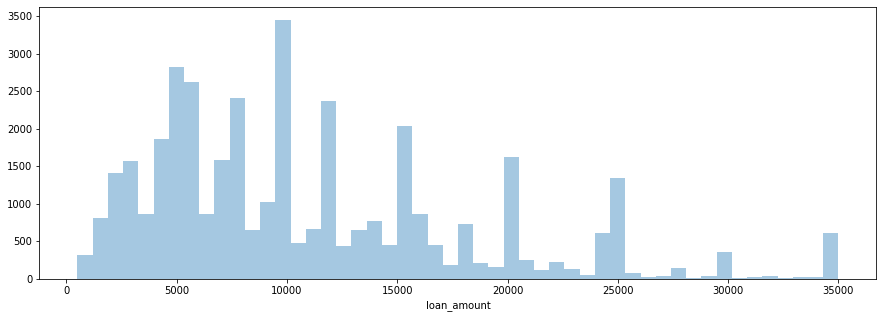

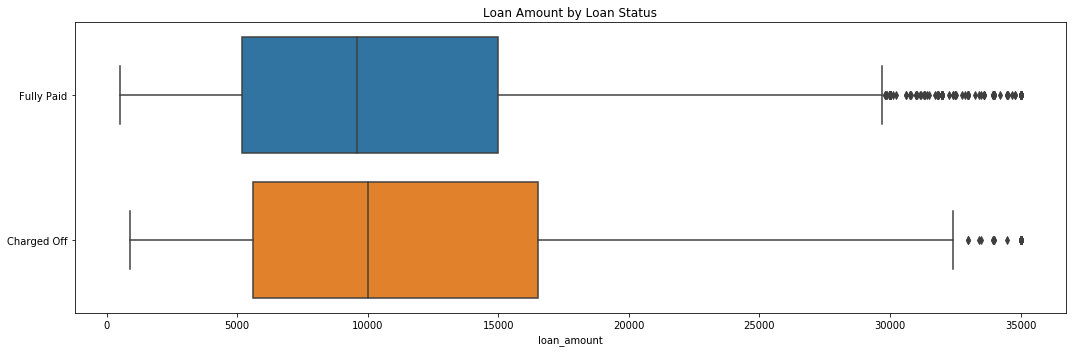

In [24]:
plot_cont('loan_amount', 'Loan Amount')

#### 2. Interest Rate

In [25]:
loan_final_df['interest_rate'].describe()

count    38577.000000
mean        11.932219
std          3.691327
min          5.420000
25%          8.940000
50%         11.710000
75%         14.380000
max         24.400000
Name: interest_rate, dtype: float64

In [26]:
loan_final_df.groupby('loan_status')['interest_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5627.0,13.820432,3.654413,5.42,11.31,13.61,16.40,24.40
Fully Paid,32950.0,11.609761,3.599964,5.42,8.49,11.49,13.99,24.11


In [27]:
# convert from Object type to int or float for ploting
loan_final_df['interest_rate'] = loan_final_df['interest_rate'].apply(pd.to_numeric, errors='coerce')
loan_final_df['interest_rate'].describe()

count    38577.000000
mean        11.932219
std          3.691327
min          5.420000
25%          8.940000
50%         11.710000
75%         14.380000
max         24.400000
Name: interest_rate, dtype: float64

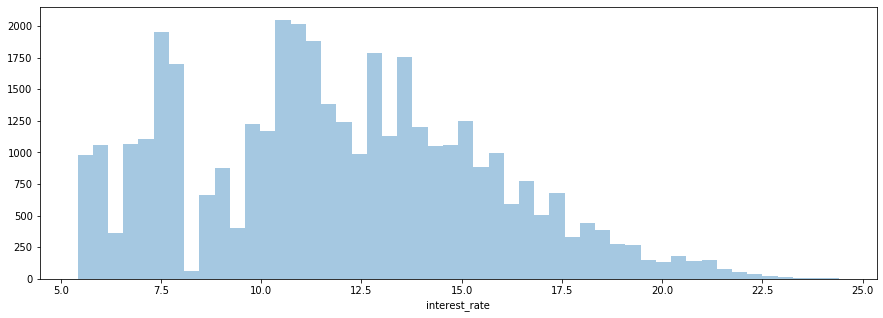

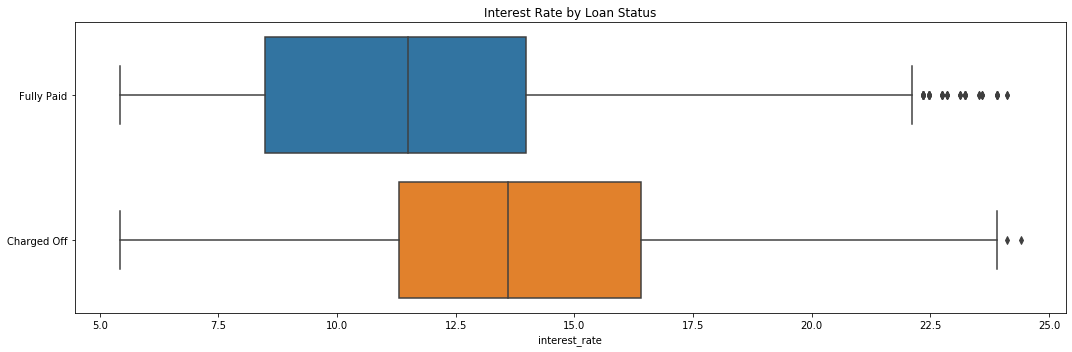

In [28]:
plot_cont('interest_rate', 'Interest Rate')

#### 3. Installment

In [29]:
loan_final_df['installment'].describe()

count    38577.000000
mean       322.466318
std        208.639215
min         15.690000
25%        165.740000
50%        277.860000
75%        425.550000
max       1305.190000
Name: installment, dtype: float64

In [30]:
loan_final_df.groupby('loan_status')['installment'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5627.0,336.175006,217.051841,22.79,168.5550,293.87,457.840,1305.19
Fully Paid,32950.0,320.125232,207.081110,15.69,165.2825,275.65,420.735,1295.21


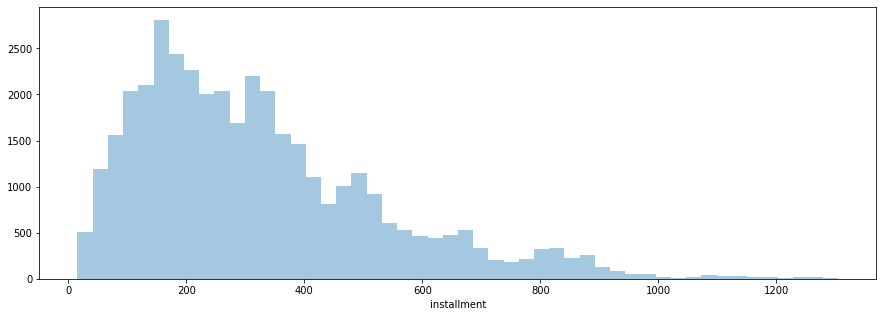

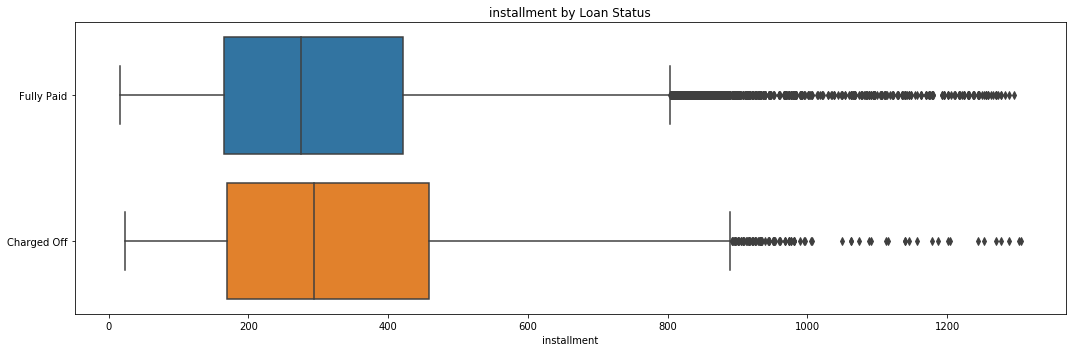

In [31]:
plot_cont('installment', 'installment')

#### 4. Grade

In [32]:
loan_final_df['grade'].describe()

count     38577
unique        7
top           B
freq      11675
Name: grade, dtype: object

In [33]:
loan_final_df['grade'].unique()

array(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype=object)

In [34]:
loan_final_df.groupby('loan_status')['grade'].describe()

,count,unique,top,freq
loan_status,,,,
Charged Off,5627,7,B,1425
Fully Paid,32950,7,B,10250


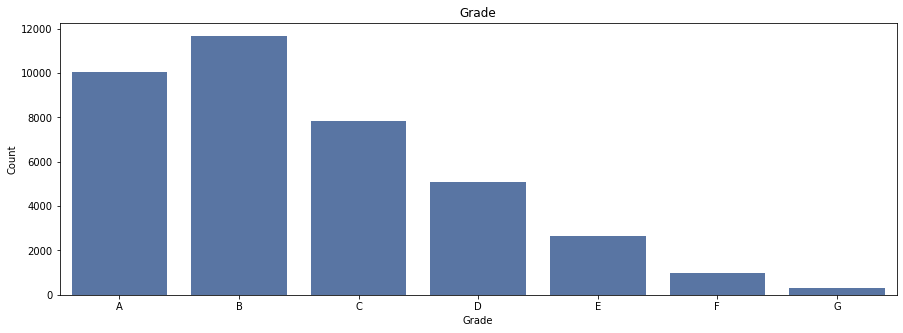

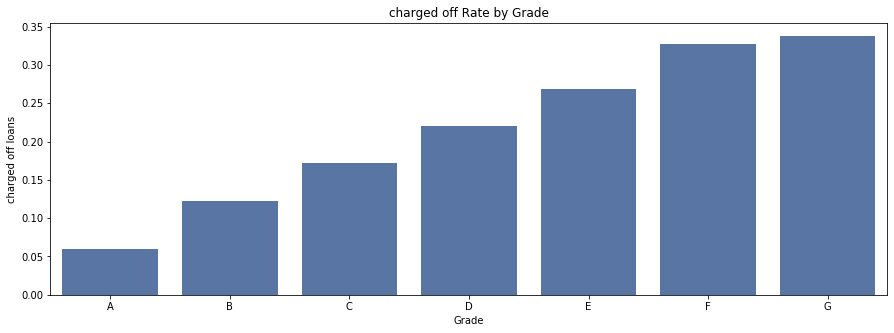

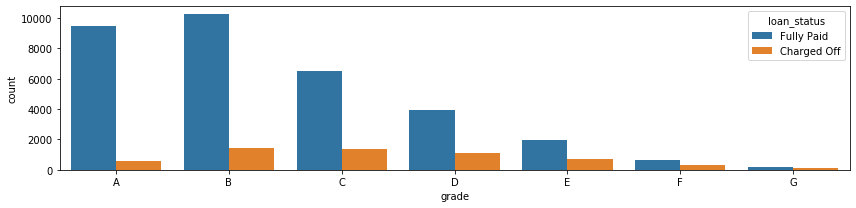

In [35]:
# Grade is not a contineous varible
plot_non_cont('grade','Grade')

#### Grade Vs Interest Rate w.r.t loan status

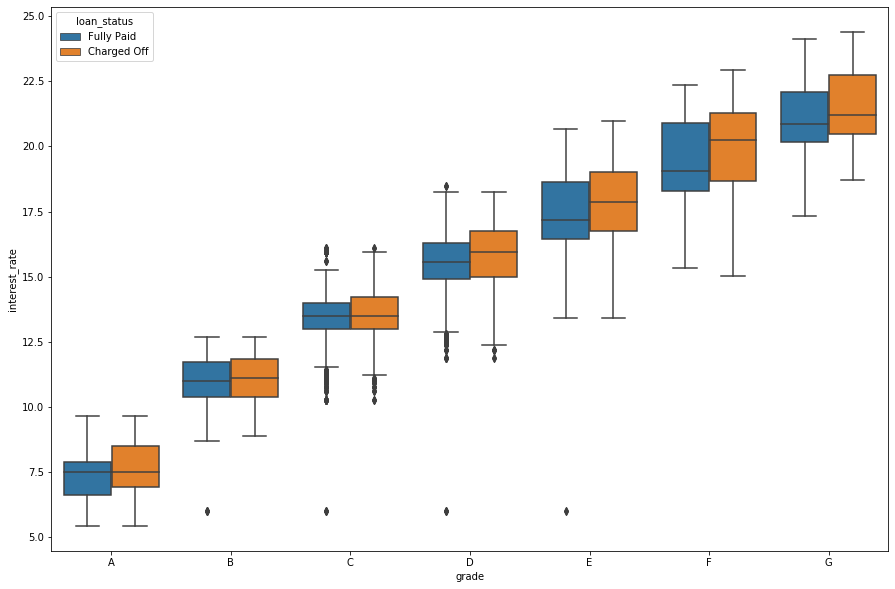

In [36]:
fig, ax = plot.subplots(1, sharex=False, figsize=(15,10))
sns.boxplot(x= loan_final_df.grade.sort_values(ascending=True) , y= loan_final_df.interest_rate, hue=loan_final_df.loan_status 
, data=loan_final_df, ax = ax)
plot.show()

#### 5. Sub Garde

In [37]:
loan_final_df['sub_grade'].describe()

count     38577
unique       35
top          A4
freq       2873
Name: sub_grade, dtype: object

In [38]:
loan_final_df['sub_grade'].unique()

array(['B2', 'C4', 'C5', 'C1', 'A4', 'E1', 'F2', 'B5', 'C3', 'B1', 'D1',
       'A1', 'B3', 'B4', 'C2', 'D2', 'A3', 'A5', 'D5', 'A2', 'E4', 'D3',
       'D4', 'F3', 'E3', 'F1', 'E5', 'G4', 'E2', 'G2', 'G1', 'F5', 'F4',
       'G5', 'G3'], dtype=object)

In [39]:
loan_final_df.groupby('loan_status')['sub_grade'].describe()

,count,unique,top,freq
loan_status,,,,
Charged Off,5627,35,B5,356
Fully Paid,32950,35,A4,2695


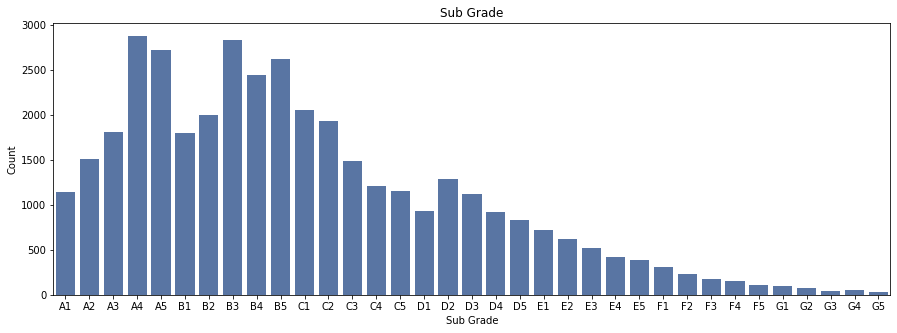

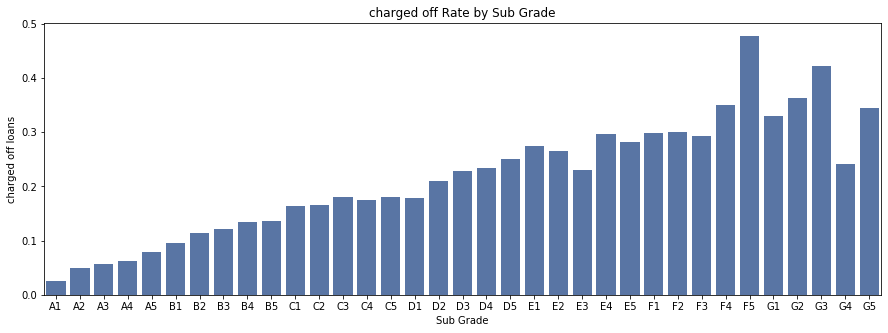

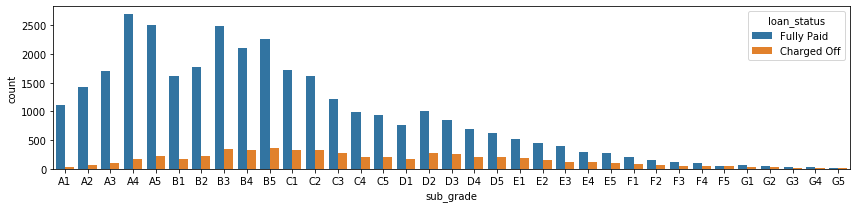

In [40]:
# Sub Grade is not a contineous varible
plot_non_cont('sub_grade','Sub Grade')

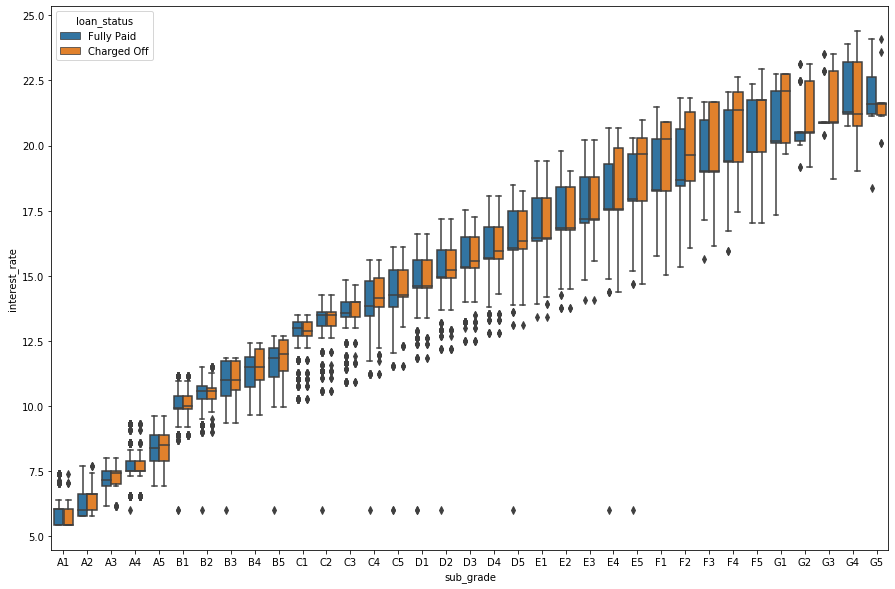

In [41]:
fig, ax = plot.subplots(1, sharex=False, figsize=(15,10))
sns.boxplot(x= loan_final_df.sub_grade.sort_values(ascending=True) , y= loan_final_df.interest_rate, hue=loan_final_df.loan_status 
, data=loan_final_df, ax = ax)
plot.show()

#### 6. employee length (years of exprience)

In [42]:
loan_final_df['emp_length'].value_counts()

10    8488
0     4508
4     4375
2     4291
3     4012
5     3194
1     3169
6     2168
7     1711
8     1435
9     1226
Name: emp_length, dtype: int64

In [43]:
loan_final_df.groupby('loan_status')['emp_length'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5627.0,5.037142,3.534031,0.0,2.0,4.0,9.0,10.0
Fully Paid,32950.0,4.895053,3.508349,0.0,2.0,4.0,8.0,10.0


#### 7. Home Ownership

In [44]:
loan_final_df['home_ownership'].value_counts()

RENT        18480
MORTGAGE    17021
OWN          2975
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

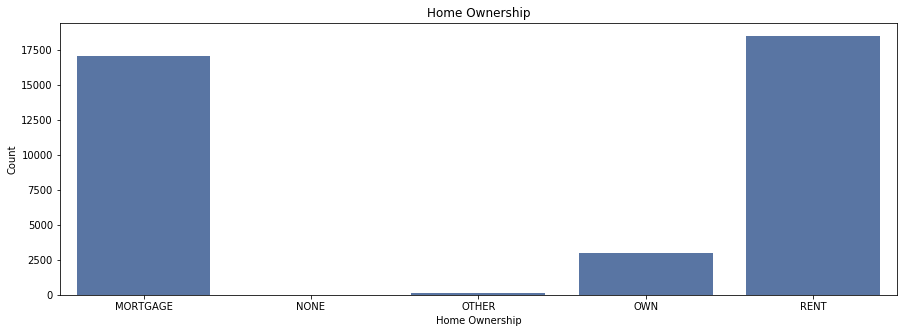

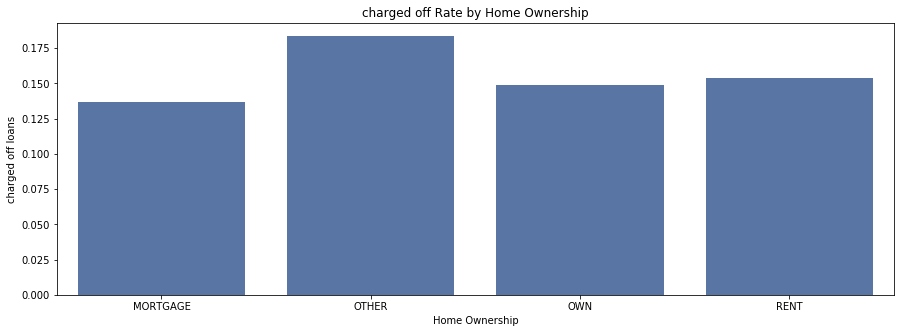

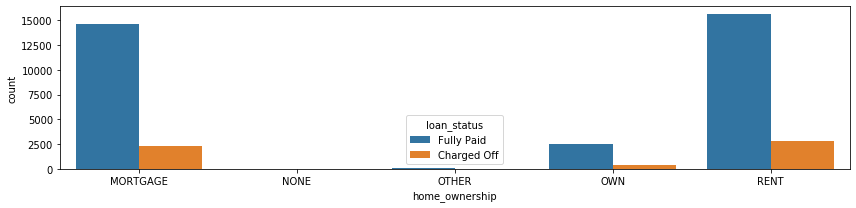

In [45]:
plot_non_cont('home_ownership', 'Home Ownership')

#### 8. Annual Income

In [46]:
loan_final_df['annual_inc'].describe()

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [47]:
loan_final_df['annual_inc_log'] = loan_final_df['annual_inc'].apply(lambda x:np.log10(x+1))
loan_final_df['annual_inc_log'].describe()

count    38577.000000
mean         4.763961
std          0.243124
min          3.602169
25%          4.602071
50%          4.769887
75%          4.913819
max          6.778151
Name: annual_inc_log, dtype: float64

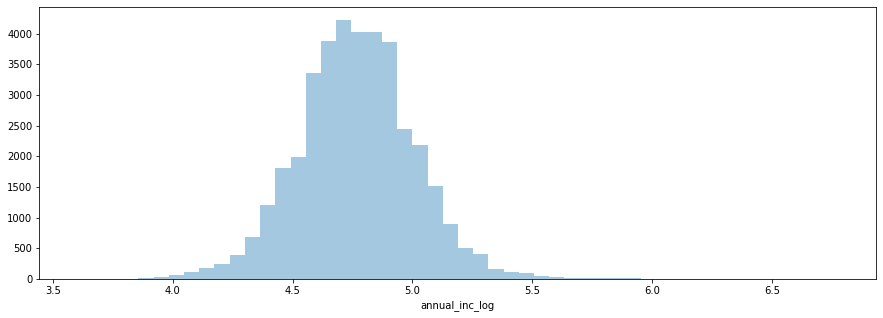

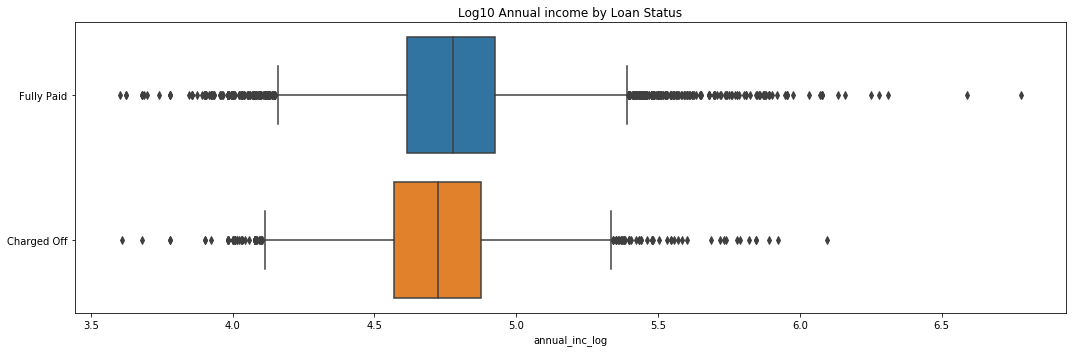

In [48]:
plot_cont('annual_inc_log', 'Log10 Annual income')

In [49]:
loan_final_df.drop(columns = ['annual_inc_log'], axis =1)
loan_final_df.shape

(38577, 34)

In [50]:
#dervied metric "loan_to_income_ratio" which will give insight of how much percent of annual income is taken as loan
loan_final_df['loan_to_income_ratio'] = round((loan_final_df.loan_amount / loan_final_df.annual_inc ) *100)
loan_final_df.loan_to_income_ratio = loan_final_df.loan_to_income_ratio.astype(int)
loan_final_df.loan_to_income_ratio.describe()

count    38577.000000
mean        18.583638
std         11.529002
min          0.000000
25%         10.000000
50%         16.000000
75%         25.000000
max         83.000000
Name: loan_to_income_ratio, dtype: float64

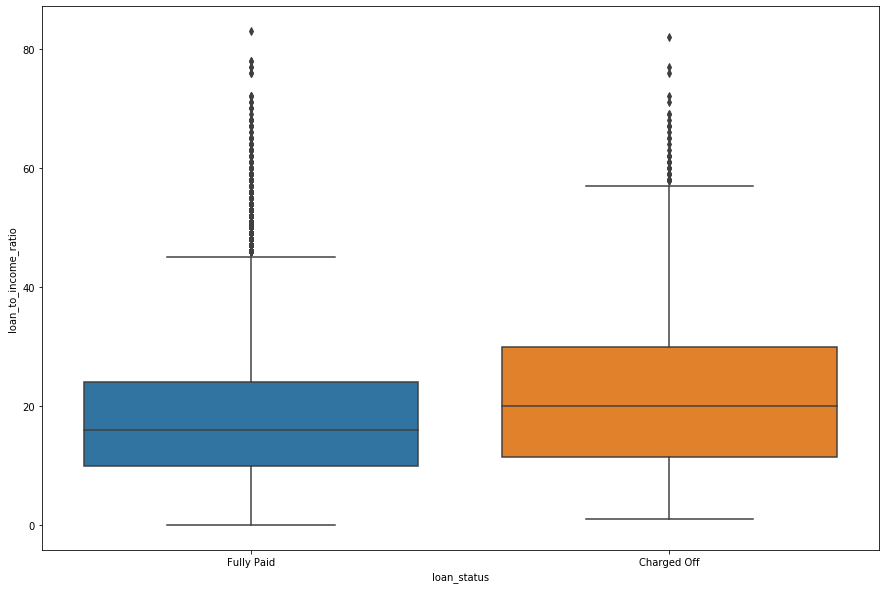

In [51]:
fig, ax = plot.subplots(1, sharex=False, figsize=(15,10))
sns.boxplot(x= loan_final_df.loan_status , y= loan_final_df.loan_to_income_ratio, data=loan_final_df, ax=ax)
plot.show()

#### 9. Verification Status

In [52]:
loan_final_df['verification_status'].value_counts()

Not Verified       16694
Verified           12206
Source Verified     9677
Name: verification_status, dtype: int64

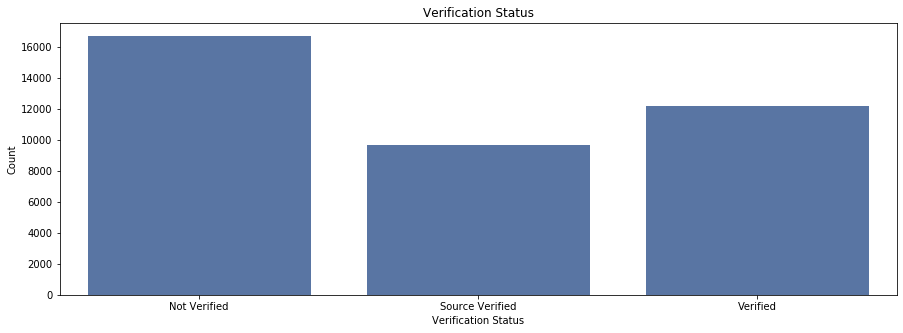

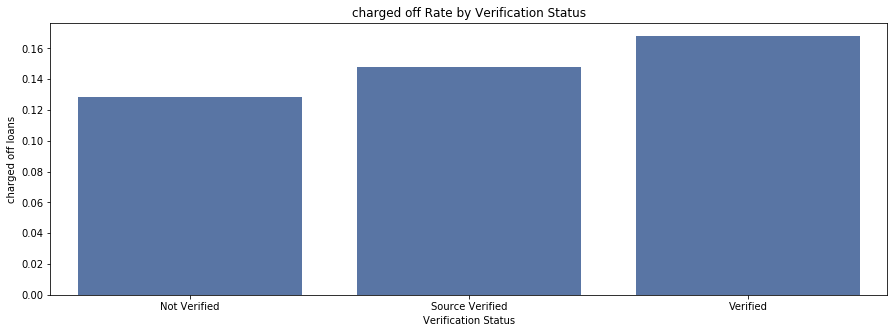

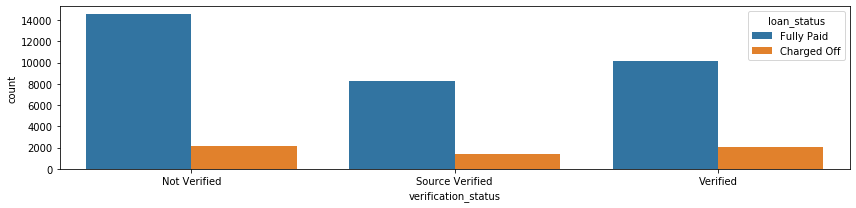

In [53]:
plot_non_cont('verification_status', 'Verification Status')

#### 10. Purpose

In [54]:
loan_final_df['loan_purpose'].value_counts()

debt_consolidation    18055
credit_card            5027
other                  3865
home_improvement       2875
major_purchase         2150
small_business         1754
car                    1499
wedding                 926
medical                 681
moving                  576
vacation                375
house                   367
educational             325
renewable_energy        102
Name: loan_purpose, dtype: int64

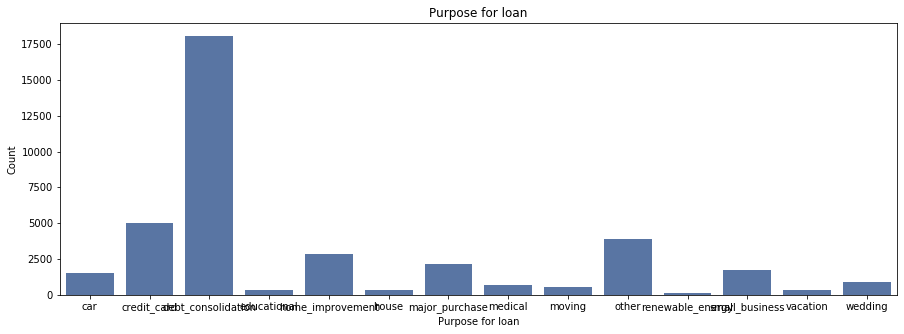

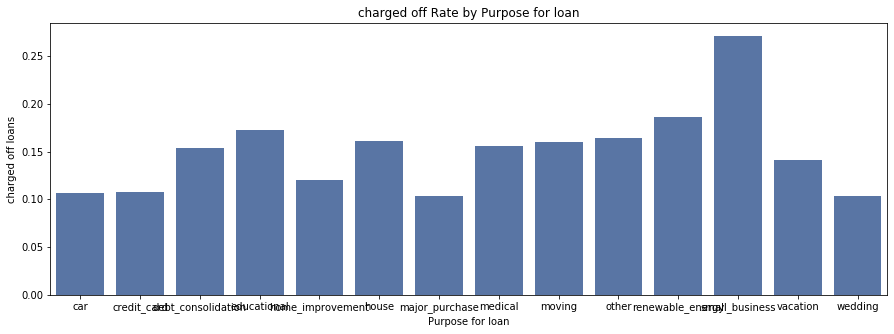

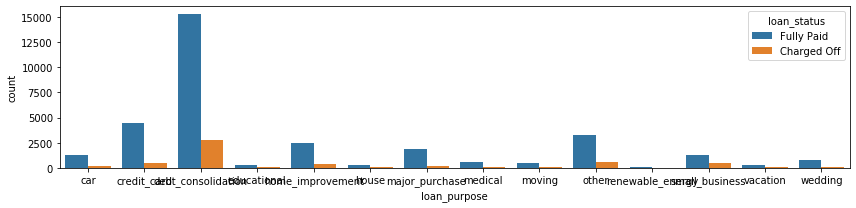

In [55]:
plot_non_cont('loan_purpose', 'Purpose for loan')

#### 11. Debt to income ratio

In [56]:
loan_final_df['dti'].describe()

count    38577.000000
mean        13.272727
std          6.673044
min          0.000000
25%          8.130000
50%         13.370000
75%         18.560000
max         29.990000
Name: dti, dtype: float64

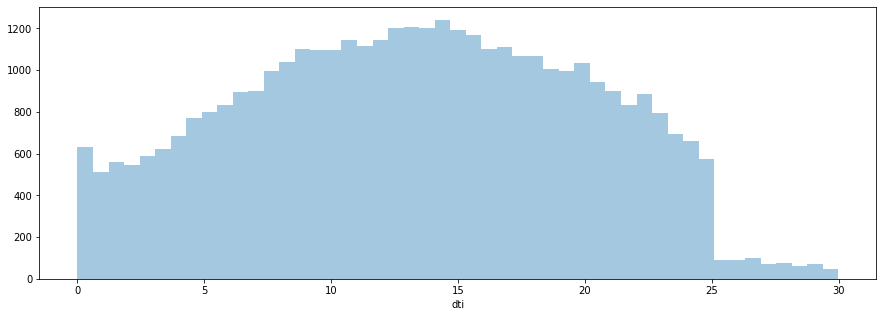

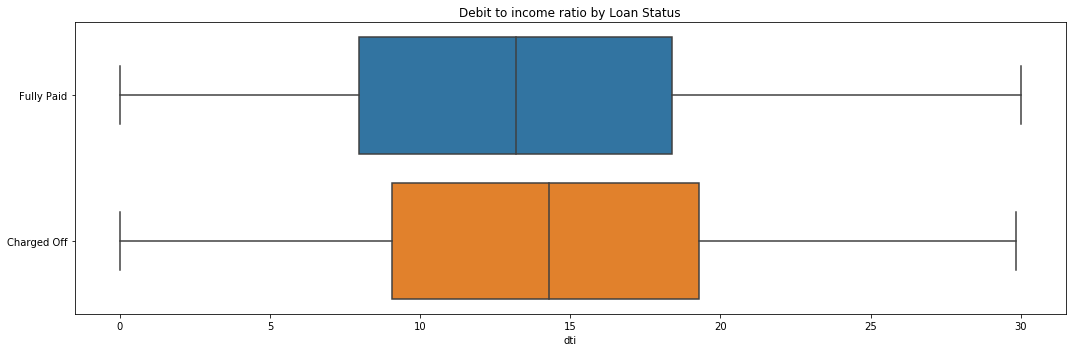

In [57]:
plot_cont('dti', 'Debit to income ratio')

In [58]:
loan_final_df.groupby('loan_status')['dti'].median()

loan_status
Charged Off    14.29
Fully Paid     13.20
Name: dti, dtype: float64

#### 12.Term

In [59]:
loan_final_df['term'].value_counts()

 36 months    29096
 60 months     9481
Name: term, dtype: int64

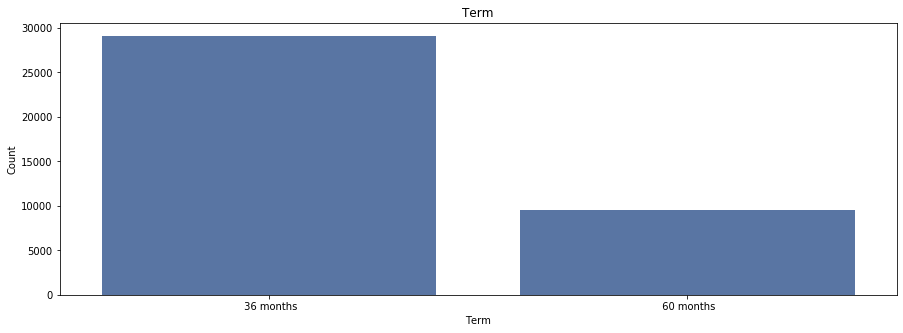

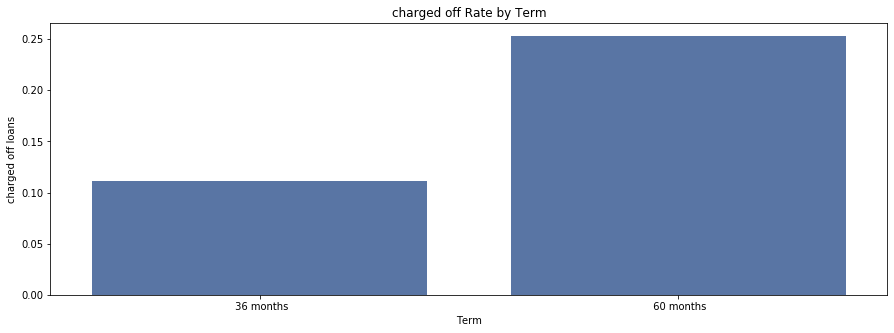

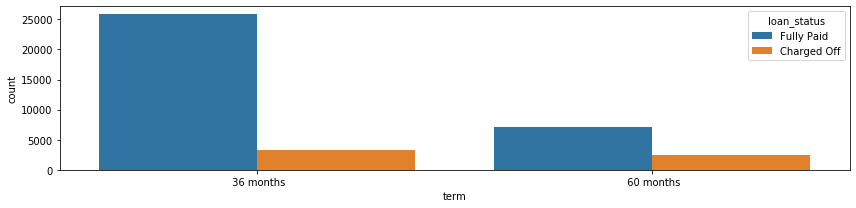

In [60]:
plot_non_cont('term', 'Term')

#### 13. State Address

In [61]:
loan_final_df.groupby('addr_state')['loan_status'].value_counts(normalize=True)[:,'Charged Off'].sort_values(ascending=False)

addr_state
NE    0.600000
NV    0.225470
SD    0.193548
AK    0.192308
FL    0.181230
MO    0.170149
HI    0.168675
ID    0.166667
NM    0.163934
OR    0.163218
CA    0.161894
UT    0.158730
MD    0.158358
GA    0.158205
NJ    0.155307
WA    0.155257
NC    0.152000
NH    0.150602
MI    0.146307
AZ    0.144876
KY    0.144695
SC    0.143791
WI    0.143182
OK    0.139373
MN    0.133884
NY    0.133856
IL    0.133288
MT    0.132530
OH    0.131579
CT    0.129477
VA    0.129291
RI    0.128866
CO    0.127937
AL    0.124138
LA    0.124122
PA    0.122616
MA    0.122591
WV    0.122093
KS    0.121569
TX    0.118842
TN    0.117647
AR    0.114894
VT    0.113208
DE    0.106195
MS    0.105263
DC    0.071090
WY    0.050000
Name: loan_status, dtype: float64

#### Revolving Utilization

In [62]:
loan_final_df['revol_util'].describe()

count    38527.000000
mean        48.702777
std         28.364741
min          0.000000
25%         25.200000
50%         49.100000
75%         72.300000
max         99.900000
Name: revol_util, dtype: float64

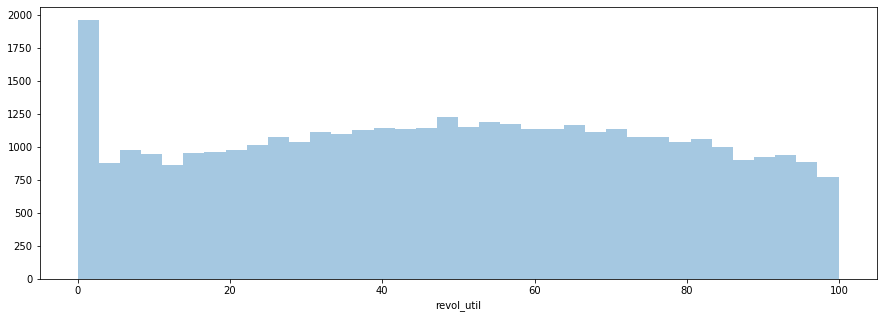

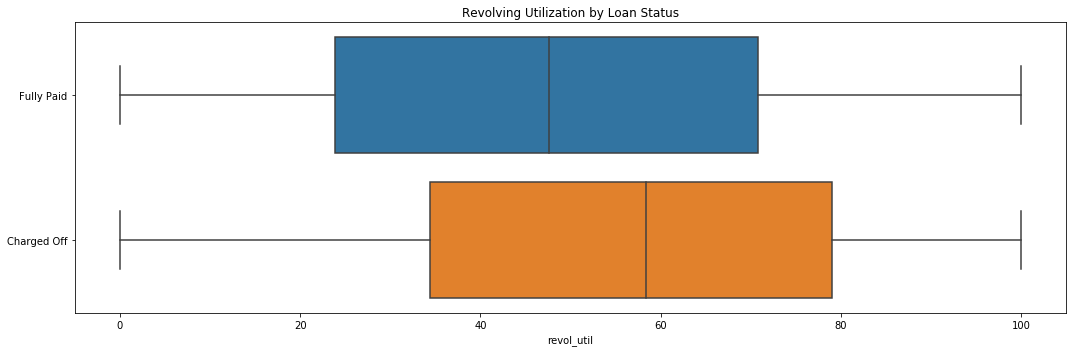

In [63]:
plot_cont('revol_util', 'Revolving Utilization')

#### grade Vs revol_util

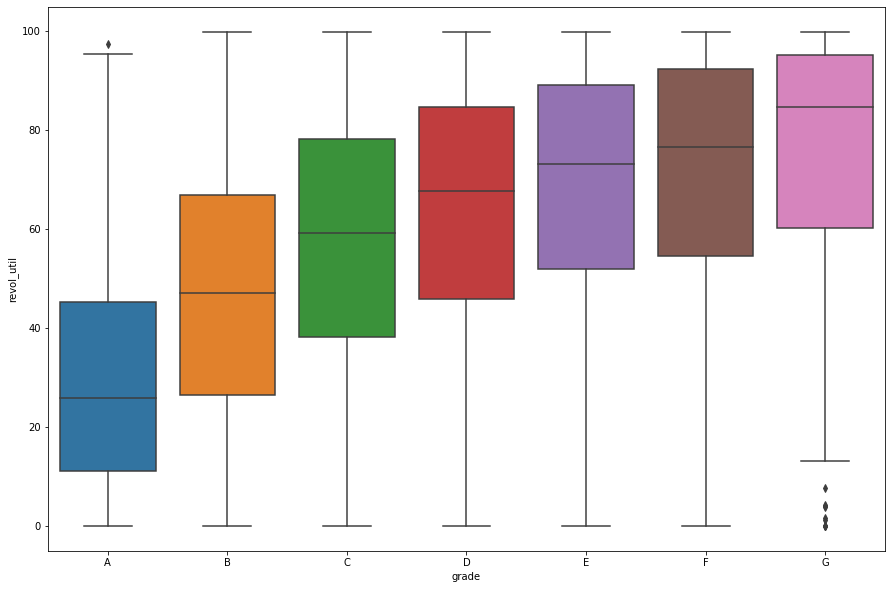

In [64]:
fig, ax = plot.subplots(1, sharex=False, figsize=(15,10))
sns.boxplot(x= loan_final_df.grade.sort_values(ascending=True)  , y= loan_final_df.revol_util, data=loan_final_df)
plot.show()

### Correlation

In [65]:
int_float_col_only = loan_final_df.select_dtypes(exclude=['object']).columns
int_float_col_only

Index(['emp_length', 'employee_id.1', 'funded_amount', 'funded_amount_invest',
       'loan_amount', 'interest_rate', 'installment', 'annual_inc', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'pub_rec_bankruptcies', 'annual_inc_log',
       'loan_to_income_ratio'],
      dtype='object')

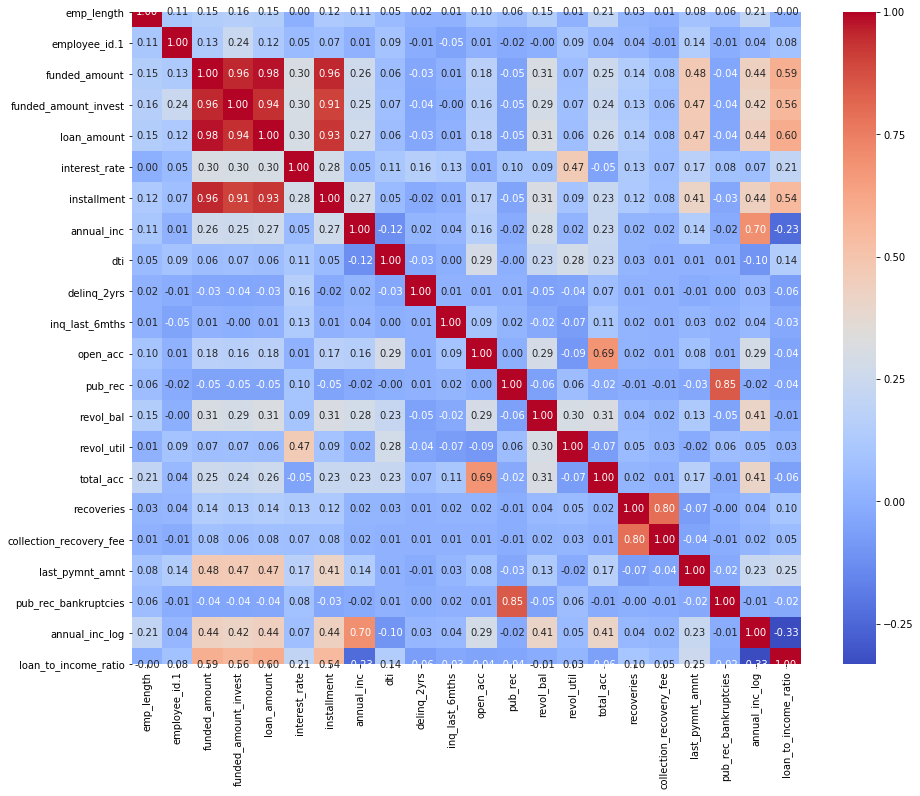

In [66]:
fig, ax = plot.subplots(figsize=(15,12))
cm_df = sns.heatmap(loan_final_df[int_float_col_only].corr(),annot=True, fmt = ".2f", cmap = "coolwarm", ax=ax)

#### Correlated between :
loan_amnt & Funded_amnt is 0.98

loan_amnt & installment is 0.93

pub_rec_bankruptcies & pub_rec 0.85

total_acc & open_acc is 0.69

loan_amnt & loan_to_incomr_ratio is 0.60

### Profile metric

#### Significant variables from our all above anlysis are
   ##### 1) grade / subgrade variable has direct influence from interest_rate
#####            (lets rank A to G values 7 to 1 based on our previous analysis)
#####     2) loan_to_income_ratio  which is new derived metric 
#####            (lets rank this value with bins of interval 10 so values will rank like for 0-10 : 1, 11-20 : 2, and etc)
#####     3) term ( as we observed most default percentage is for 60 months we rank it 1 and 36 months as 2)
#####     4) revol_util (lets rank this similar to 'loan_to_income_ratio'  ) 
##### new variable 'profile_rating' will be sum of all above rank values

In [67]:
def grade_ranker(g):
    rank = 0
    if(g == 'A'):
        rank = 7
    elif(g == 'B'):
        rank = 6
    elif(g == 'C'):
        rank = 5
    elif(g == 'D'):
        rank = 4
    elif(g == 'E'):
        rank = 3
    elif(g == 'F'):
        rank = 2
    elif(g == 'G'):
        rank = 1
    return rank

def lti_ranker(val):
    rank = 0
    if(val <= 10):
        rank = 10
    elif(val <= 20):
        rank = 9
    elif(val <= 30):
        rank = 8
    elif(val <= 40):
        rank = 7
    elif(val <= 50):
        rank = 6
    elif(val <= 60):
        rank = 5
    elif(val <= 70):
        rank = 4
    elif(val <= 80):
        rank = 3
    elif(val <= 90):
        rank = 2
    elif(val <= 100):
        rank = 1
    return rank

def revol_util_ranker(val):
    rank = 0
    if(val <= 10):
        rank = 10
    elif(val <= 20):
        rank = 9
    elif(val <= 30):
        rank = 8
    elif(val <= 40):
        rank = 7
    elif(val <= 50):
        rank = 6
    elif(val <= 60):
        rank = 5
    elif(val <= 70):
        rank = 4
    elif(val <= 80):
        rank = 3
    elif(val <= 90):
        rank = 2
    elif(val <= 100):
        rank = 1
    return rank

def term_ranker(term):
    rank = 0
    if(term == ' 36 months'):
        rank = 2
    elif(term == ' 60 months'):
        rank = 1
    return rank

def rating_calculator(rec):
    return grade_ranker(rec.grade)+ lti_ranker(rec.loan_to_income_ratio)+ revol_util_ranker(rec.revol_util)+ term_ranker(rec.term)
    
loan_final_df['profile_rating'] = loan_final_df.apply(lambda x: rating_calculator(x), axis=1)
loan_final_df['profile_rating'].astype(int)
loan_final_df['profile_rating'].describe()

count    38577.000000
mean        21.510045
std          4.076278
min          8.000000
25%         19.000000
50%         22.000000
75%         25.000000
max         29.000000
Name: profile_rating, dtype: float64

In [68]:
loan_final_df.groupby(['profile_rating','loan_status']).loan_status.count()

profile_rating  loan_status
8               Charged Off       3
                Fully Paid        2
9               Charged Off       5
                Fully Paid       14
10              Charged Off      28
                Fully Paid       32
11              Charged Off      63
                Fully Paid       88
12              Charged Off      88
                Fully Paid      179
13              Charged Off     186
                Fully Paid      298
14              Charged Off     237
                Fully Paid      533
15              Charged Off     294
                Fully Paid      899
16              Charged Off     431
                Fully Paid     1236
17              Charged Off     420
                Fully Paid     1752
18              Charged Off     503
                Fully Paid     2197
19              Charged Off     505
                Fully Paid     2527
20              Charged Off     489
                Fully Paid     2669
21              Charged Off     494


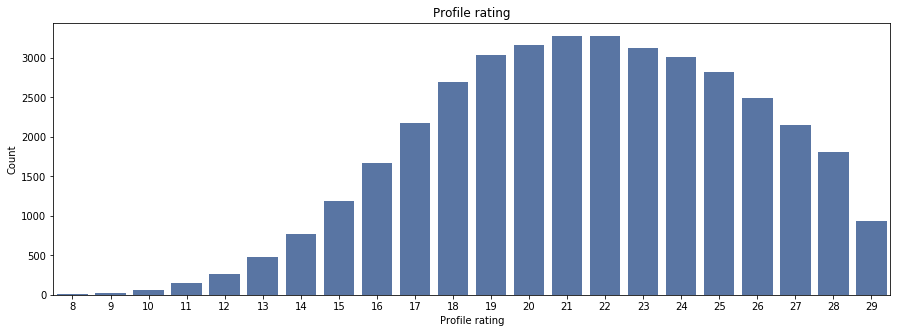

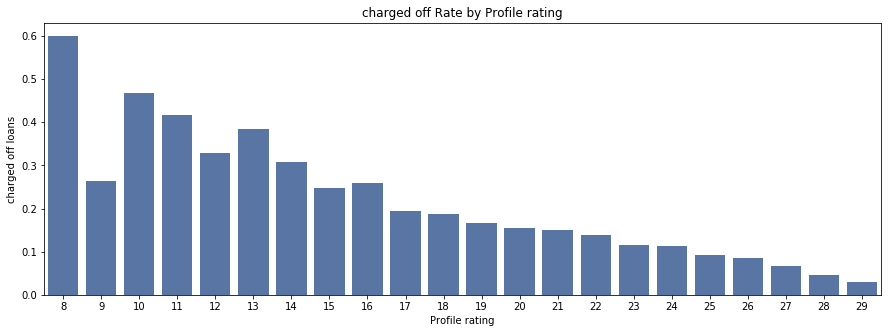

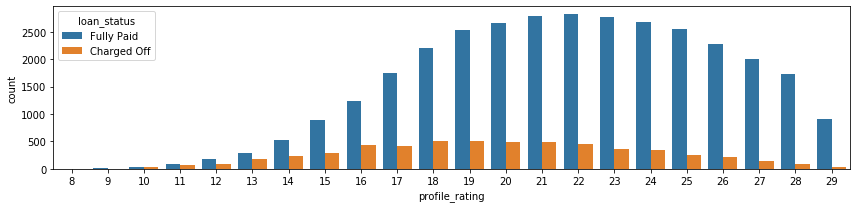

In [69]:
plot_non_cont('profile_rating', 'Profile rating')

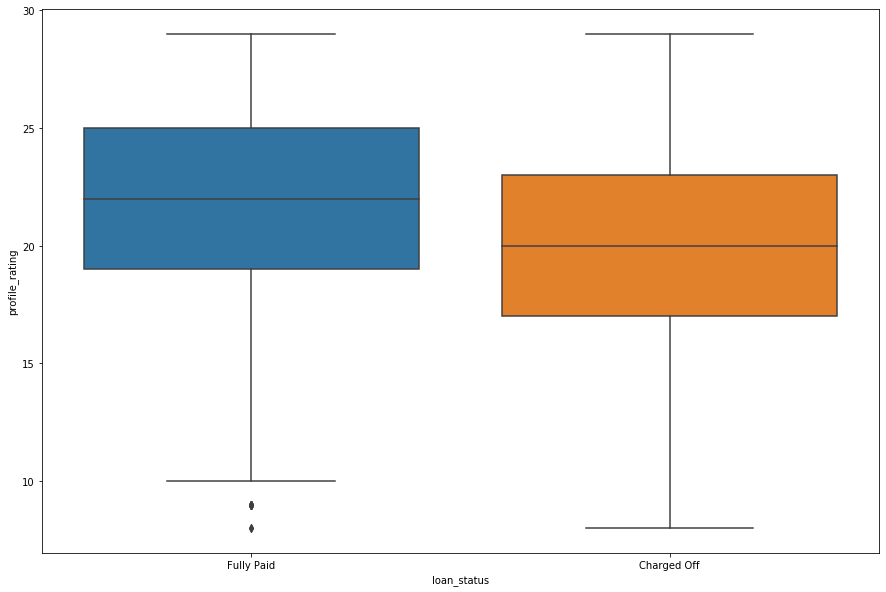

In [70]:
fig, ax = plot.subplots(1, sharex=False, figsize=(15,10))
sns.boxplot(x= loan_final_df.loan_status , y= loan_final_df.profile_rating, data=loan_final_df, ax = ax)
plot.show()

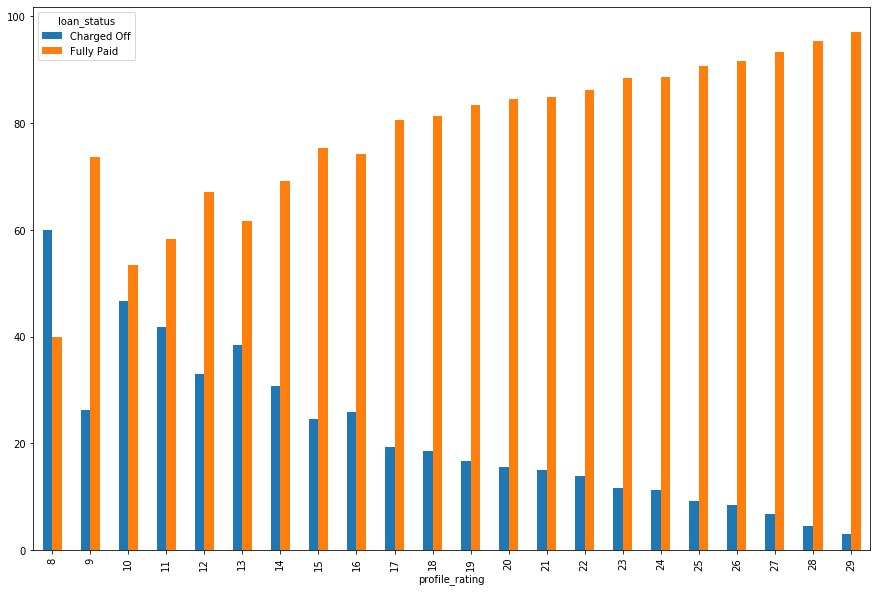

In [71]:
plot.rcParams["figure.figsize"]=[15,10]
#fig, ax = plot.subplots(1, sharex=False, figsize=(15,10))
pd.crosstab(loan_final_df['profile_rating'],loan_final_df['loan_status']).apply(lambda x: (x/x.sum())*100, axis=1).plot.bar()

#### Conclusion: